# Regridding exercise (1)

In [1]:
# Inline images in IPython Notebook - not needed in Python
%matplotlib inline

In [2]:
# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the cf and cfplot packages
import cf, cfplot as cfp

## Read data2.nc

In [4]:
# Read in ncas_data/data2.nc (use the read_field function)
f = cf.read('ncas_data/data2.nc')[0]

In [5]:
# Examine the the data to see what fields are in the dataset and check the resolution
print(f)

Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(long_name=t(1), long_name=p(1), latitude(160), longitude(320)) K
Dimension coords: long_name=t(1) = [1981-01-21 00:00:00]
                : long_name=p(1) = [1000.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east


## Read data3.nc

In [6]:
# Read in ncas_data/data3.nc (use the read_field function)
g = cf.read('ncas_data/data3.nc')[0]

In [7]:
# Examine the data similarly
print(g)

Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(long_name=t(1), long_name=p(1), long_name=latitude(256), long_name=longitude(512)) K
Dimension coords: long_name=t(1) = [1981-01-21 00:00:00]
                : long_name=p(1) = [1000.0] mbar
                : long_name=latitude(256) = [89.46294403076172, ..., -89.46294403076172] degrees_north
                : long_name=longitude(512) = [0.0, ..., 359.296875] degrees_east


# Show the resulting error

In [8]:
# Try regridding the data3.nc field to the grid of data2.nc using the 'conservative' regridding method -
# observe the resulting error

h = g.regrids(f, method='conservative')

ValueError: Source <CF DimensionCoordinate: long_name=longitude(512) degrees_east> coordinates must have bounds for conservative regridding.

## Regrid with bilinear method / now known as linear as bilinear not supported from 3.2.0

In [10]:
# Regrid data3.nc to the grid of data2.nc using the 'bilinear' regridding method
h = g.regrids(f, method='linear')

In [11]:
# Examine the result to check it is on the new grid
print(h)

Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(long_name=t(1), long_name=p(1), latitude(160), longitude(320)) K
Dimension coords: long_name=t(1) = [1981-01-21 00:00:00]
                : long_name=p(1) = [1000.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east


In [12]:
# Find the difference between data2.nc and the regridded field
diff = f - h

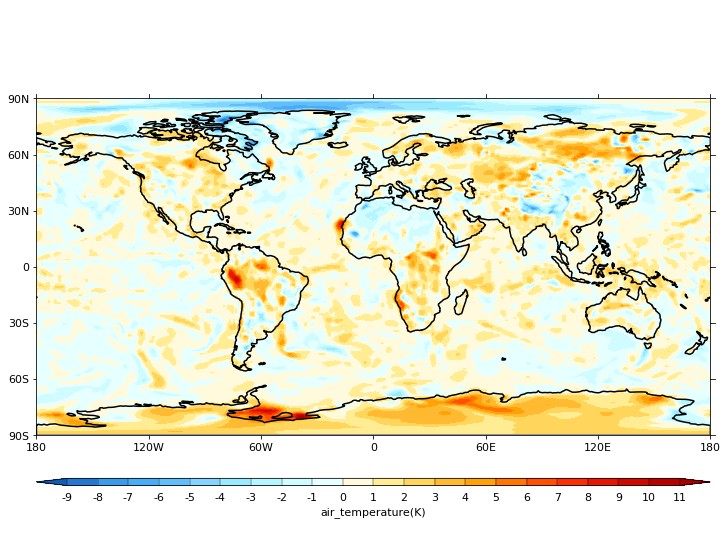

In [13]:
# Make a contour plot of this difference
cfp.con(diff, lines=False)

In [14]:
# Get the latitude and longitude coordinates of data2.nc using the field's coordinate method
lon1 = f.coordinate('X')
lat1 = f.coordinate('Y')

In [15]:
# Create Voronoi bounds for each of the coordinates (use the coordinate's "create_bounds" and  "set_bounds" methods)
lon1_bounds = lon1.create_bounds()
lat1_bounds = lat1.create_bounds(min=-90, max=90)
lon1.set_bounds(lon1_bounds)
lat1.set_bounds(lat1_bounds)

In [16]:
# Perform the same operations for the field from data3.nc
lon2 = g.coordinate('X')
lat2 = g.coordinate('Y')
lon2_bounds = lon2.create_bounds()
lat2_bounds = lat2.create_bounds(min=-90, max=90)
lon2.set_bounds(lon2_bounds)
lat2.set_bounds(lat2_bounds)

In [17]:
# Regrid data3.nc to the grid of data2.nc using the 'conservative' regridding method
i = g.regrids(f, method='conservative')

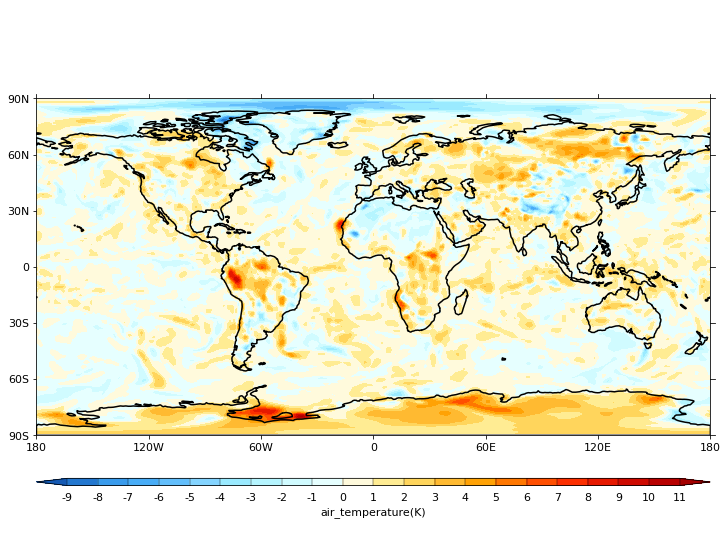

In [18]:
# Plot the difference between data2.nc and the regridded field
cfp.con(f - i, lines=False)

# Observe the error

In [19]:
# Try to find the difference between the conservatively regridded field and the bilinearly regridded field -
# observe the error
diff = i - h

ValueError: Can't combine size 160 'latitude' axes with non-matching coordinate values

In [20]:
# The error occurs because the conservatively regridded field's latitute has bounds, but the bilinearly regridded
# field's does not - delete the conservatively regridded field's latitude and longitude bounds by using the
# coordinates' del_bounds method
i.coordinate('X').del_bounds()
i.coordinate('Y').del_bounds()

<CF Bounds: latitude(160, 2) degrees_north>

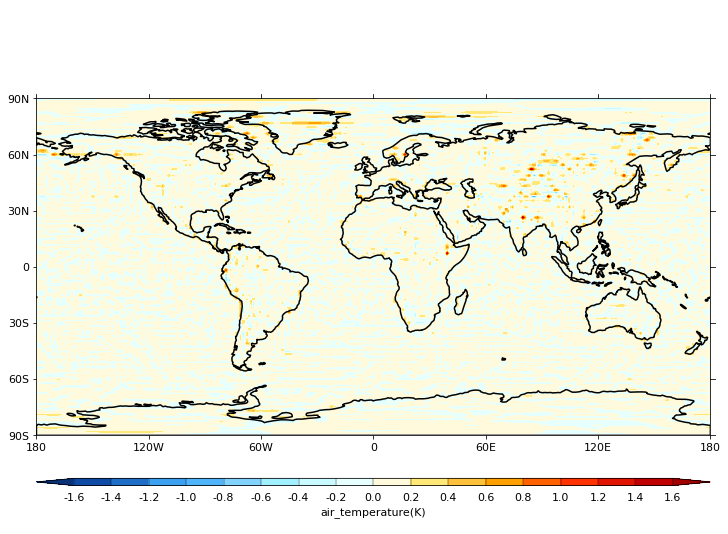

In [21]:
# Plot the difference between the conservatively regridded field and the bilinearly regridded field
cfp.cscale('scale1')
cfp.levs(min=-1.6, max=1.6, step=0.2)
cfp.con(i - h, lines=False)